<a href="https://colab.research.google.com/github/Basifrank/Hamoye_DS_Internship/blob/master/Hamoye_Stage_C_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [55]:
data = pd.read_csv('/content/drive/My Drive/Hamoye Internship/Stage C Data/Data_for_UCI_named.csv')

dataset = data.copy()

In [56]:
dataset.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [57]:
dataset.drop('stab', axis=1, inplace = True)

In [58]:
dataset['target'] = dataset['stabf'].replace(['unstable', 'stable'], [0, 1])

In [59]:
dataset.target.value_counts()

0    6380
1    3620
Name: target, dtype: int64

In [60]:
data_df = dataset.copy()

In [61]:
import sklearn.utils
data_df = sklearn.utils.shuffle(data_df)

In [62]:
data_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf,target
1306,5.514014,5.671512,1.430503,7.783236,1.907474,-0.526721,-0.867226,-0.513526,0.193712,0.815058,0.080877,0.551265,unstable,0
1849,6.143967,3.404725,9.508288,7.315868,3.689560,-1.485367,-1.363024,-0.841170,0.319794,0.816018,0.278534,0.089200,stable,1
3952,8.226120,4.467637,5.737888,9.218351,4.785556,-1.631295,-1.777610,-1.376652,0.216858,0.183236,0.735129,0.895918,unstable,0
1782,4.306374,2.698565,7.111600,1.667149,4.036521,-1.721545,-0.661915,-1.653061,0.502570,0.784432,0.357268,0.283608,stable,1
8694,8.633664,2.670615,7.678194,3.821826,2.327391,-0.733195,-0.547283,-1.046913,0.894086,0.627477,0.367716,0.831349,unstable,0


In [63]:
data_df = data_df.reset_index(drop=True)

In [64]:
data_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf,target
0,5.514014,5.671512,1.430503,7.783236,1.907474,-0.526721,-0.867226,-0.513526,0.193712,0.815058,0.080877,0.551265,unstable,0
1,6.143967,3.404725,9.508288,7.315868,3.689560,-1.485367,-1.363024,-0.841170,0.319794,0.816018,0.278534,0.089200,stable,1
2,8.226120,4.467637,5.737888,9.218351,4.785556,-1.631295,-1.777610,-1.376652,0.216858,0.183236,0.735129,0.895918,unstable,0
3,4.306374,2.698565,7.111600,1.667149,4.036521,-1.721545,-0.661915,-1.653061,0.502570,0.784432,0.357268,0.283608,stable,1
4,8.633664,2.670615,7.678194,3.821826,2.327391,-0.733195,-0.547283,-1.046913,0.894086,0.627477,0.367716,0.831349,unstable,0


In [65]:
#more preprocessing

X = data_df.drop(columns=['stabf', 'target'])
y = data_df['target']

In [66]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [67]:
y_train.value_counts()

0    5121
1    2879
Name: target, dtype: int64

In [68]:
x_test.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
9953,5.426539,9.538060,3.411805,9.226857,3.515091,-0.579621,-1.464929,-1.470540,0.593951,0.138241,0.863672,0.869223
3850,3.941508,5.718503,9.788810,1.783620,3.858277,-0.632223,-1.981696,-1.244358,0.143691,0.298940,0.365651,0.900329
4962,7.270244,3.914868,2.536057,6.730865,4.029708,-1.202994,-1.461296,-1.365417,0.939412,0.288829,0.504923,0.430718
3886,0.669658,6.899916,0.751601,5.881844,3.625298,-1.248739,-0.534615,-1.841944,0.536735,0.906721,0.219817,0.598729
5437,4.855018,1.156227,3.346892,5.678423,3.140080,-1.291828,-0.798161,-1.050091,0.454527,0.489931,0.490014,0.512587


In [69]:
x_train.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
2694,3.307691,0.580638,1.721025,9.155508,3.444920,-1.441228,-0.697089,-1.306603,0.628883,0.969730,0.529251,0.530081
5140,4.693159,0.856265,2.456657,7.910371,3.585482,-1.632204,-1.196861,-0.756417,0.650525,0.544490,0.593047,0.743757
2568,1.358927,4.943523,6.912214,5.609404,4.405026,-1.155776,-1.280707,-1.968543,0.282626,0.314393,0.240806,0.161212
3671,5.323227,8.656613,8.269178,0.703799,5.046735,-1.757030,-1.481664,-1.808042,0.670434,0.491669,0.719358,0.301396
7427,9.786935,8.242921,2.346324,3.137993,3.640712,-0.627925,-1.605843,-1.406944,0.848185,0.589006,0.412810,0.786709


In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()



In [71]:
#Transforming x_train

x_train_transformed = scaler.fit_transform(x_train)

x_train_transformed = pd.DataFrame(x_train_transformed, columns=x_train.columns)

In [72]:
x_train_transformed.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,-0.718699,-1.700689,-1.282411,1.421515,-0.406889,-0.443433,1.287578,-0.127683,0.375857,1.623570,0.008502,0.015020
1,-0.212097,-1.600071,-1.013061,0.968404,-0.220628,-0.883807,0.127459,1.142224,0.454658,0.074612,0.240332,0.795064
2,-1.431273,-0.108009,0.618330,0.131073,0.865358,0.214794,-0.067172,-1.655532,-0.884951,-0.763529,-1.039699,-1.331565
3,0.018290,1.247462,1.115180,-1.654098,1.715695,-1.171645,-0.533652,-1.285073,0.527152,-0.117791,0.699342,-0.819812
4,1.650463,1.096443,-1.053459,-0.768284,-0.147443,1.431975,-0.821908,-0.359283,1.174386,0.236762,-0.414642,0.951864


In [73]:
x_train.reset_index(drop=True).head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,3.307691,0.580638,1.721025,9.155508,3.444920,-1.441228,-0.697089,-1.306603,0.628883,0.969730,0.529251,0.530081
1,4.693159,0.856265,2.456657,7.910371,3.585482,-1.632204,-1.196861,-0.756417,0.650525,0.544490,0.593047,0.743757
2,1.358927,4.943523,6.912214,5.609404,4.405026,-1.155776,-1.280707,-1.968543,0.282626,0.314393,0.240806,0.161212
3,5.323227,8.656613,8.269178,0.703799,5.046735,-1.757030,-1.481664,-1.808042,0.670434,0.491669,0.719358,0.301396
4,9.786935,8.242921,2.346324,3.137993,3.640712,-0.627925,-1.605843,-1.406944,0.848185,0.589006,0.412810,0.786709


In [74]:
#Transforming x_test

x_test_transformed = scaler.fit_transform(x_test)
x_test_transformed = pd.DataFrame(x_test_transformed, columns=x_test.columns)


In [75]:
#importing Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

from sklearn.model_selection import RandomizedSearchCV 




***Algorithms***

In [76]:
#Algorithms lightgbm, xgboost and randonforest

xgb_model = XGBClassifier(random_state = 1)
lightgbm_model = lgb.LGBMClassifier(random_state = 1)
RFC = RandomForestClassifier(random_state = 1)


In [77]:
#Algorithms Extra tree classifier

tree = ExtraTreesClassifier(random_state=1)

In [126]:
tree2 = ExtraTreesClassifier()
tree2.fit(x_train_transformed, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

**Models**

In [121]:
#Fitting lightgbm, xgboost and randonforest models

xgb_model.fit(x_train_transformed, y_train)

lightgbm_model.fit(x_train_transformed, y_train)

RFC.fit(x_train_transformed, y_train)

tree.fit(x_train_transformed, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

In [99]:
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features,
                         }

In [ ]:
n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1 and random_state = 1.

 **RandomizedSearchCV**

In [102]:
tree_cv = RandomizedSearchCV(tree, hyperparameter_grid, cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1, random_state = 1)

In [103]:
#Improved estra tree model fiting with trained data to find best Hyperparameters

tree_cv.fit(x_train_transformed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                        

In [104]:
# Print the tuned parameters and score

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None}
Best score is 0.9252499999999999


In [119]:
#Improves extra tree classifier Algorithm


improved_tree = ExtraTreesClassifier(random_state=1, n_estimators = 1000, min_samples_split = 2, min_samples_leaf= 8, max_features= None)
improved_tree.fit(x_train_transformed, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=None,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=8, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=1000,
                     n_jobs=None, oob_score=False, random_state=1, verbose=0,
                     warm_start=False)

#All Predictions

In [122]:
#Predictions lightgbm, xgboost and randonforest

xgboost_predictions = xgb_model.predict(x_test_transformed)

lightgbm_predictions = lightgbm_model.predict(x_test_transformed)

randonforest_predictions = RFC.predict(x_test_transformed)

tree_predictions = tree.predict(x_test_transformed)

improved_tree_predictions = improved_tree.predict(x_test_transformed)


In [123]:
treeCV_predictions = tree_cv.predict(x_test_transformed)

**Measuring Classification Performance**

In [131]:
#Confusion Matrix.py

from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

cnf_mat_xgboost = confusion_matrix(y_true=y_test, y_pred = xgboost_predictions)

cnf_mat_light = confusion_matrix(y_true=y_test, y_pred=lightgbm_predictions)

cnf_mat_randomforest = confusion_matrix(y_true=y_test, y_pred=randonforest_predictions)

cnf_mat_tree = confusion_matrix(y_true=y_test, y_pred=tree_predictions)

cnf_mat_improvedTree = confusion_matrix(y_true=y_test, y_pred=improved_tree_predictions)


In [124]:
#accuracy

accuracy_xgboost = accuracy_score(y_true=y_test, y_pred=xgboost_predictions)

accuracy_light = accuracy_score(y_true=y_test, y_pred=lightgbm_predictions)

accuracy_randomforest = accuracy_score(y_true=y_test, y_pred=randonforest_predictions)

accuracy_tree = accuracy_score(y_true=y_test, y_pred=tree_predictions)

accuracy_improvedTree = accuracy_score(y_true=y_test, y_pred=improved_tree_predictions)



print(accuracy_xgboost)

print(accuracy_light)

print(accuracy_randomforest)

print(accuracy_tree)

print(accuracy_improvedTree)

0.917
0.9445
0.919
0.9125
0.924


In [106]:
accuracy_treeCV = accuracy_score(y_true=y_test, y_pred=treeCV_predictions)

In [92]:
print(accuracy_randomforest)

print(accuracy_xgboost)
print(accuracy_light)

0.919
0.917
0.9445


In [112]:
print(accuracy_treeCV), print(accuracy_tree), print(accuracy_improvedTree)

0.924
0.9125
0.914


(None, None, None)

**Feature importance**

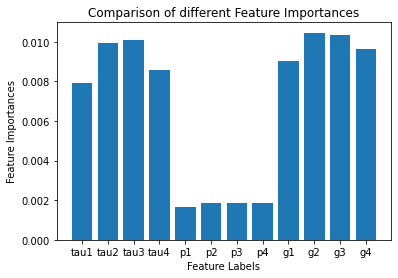

In [132]:
# Computing the importance of each feature 
feature_importance = improved_tree.feature_importances_ 
import matplotlib.pyplot as plt 
  
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        improved_tree.estimators_], 
                                        axis = 0) 
#Step 4: Visualizing and Comparing the results


# Plotting a Bar Graph to compare the models 
plt.bar(X.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 

Feature ranking:
1. feature 0 (0.144229)
2. feature 1 (0.139034)
3. feature 3 (0.137769)
4. feature 2 (0.134196)
5. feature 10 (0.110986)
6. feature 9 (0.107610)
7. feature 8 (0.104281)
8. feature 11 (0.102597)
9. feature 5 (0.005312)
10. feature 7 (0.005145)
11. feature 6 (0.005133)
12. feature 4 (0.003709)


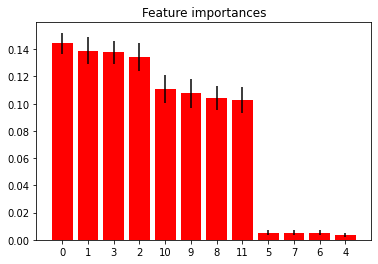

In [133]:
importances = improved_tree.feature_importances_
std = np.std([tree.feature_importances_ for tree in improved_tree.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [134]:
X.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4'],
      dtype='object')

In [ ]:
#precision

precision_xgboost = precision_score(y_true=y_test, y_pred=xgboost_predictions)

precision_light = precision_score(y_true=y_test, y_pred=lightgbm_predictions)

precision_randomforest = precision_score(y_true=y_test, y_pred=randonforest_predictions)

precision_tree = precision_score(y_true=y_test, y_pred=tree_predictions)

precision_improvedTree = precision_score(y_true=y_test, y_pred=improved_tree_predictions)





print('Precision: {}'.format(round(precision_xgboost*100), 2))
print('Precision: {}'.format(round(precision_light*100), 2))
print('Precision: {}'.format(round(precision_randomforest*100), 2))
print('Precision: {}'.format(round(precision_tree*100), 2))
print('Precision: {}'.format(round(precision_improvedTree*100), 2))

Precision: 91.0
Precision: 94.0
Precision: 92.0
Precision: 96.0
Precision: 96.0


In [ ]:
#recall

#recall = recall_score(y_true=y_test, y_pred=new_predictions)


recall_xgboost = recall_score(y_true=y_test, y_pred=xgboost_predictions)

recall_light = recall_score(y_true=y_test, y_pred=lightgbm_predictions)

recall_randomforest = recall_score(y_true=y_test, y_pred=randonforest_predictions)

recall_tree = recall_score(y_true=y_test, y_pred=tree_predictions)

recall_improvedTree = recall_score(y_true=y_test, y_pred=improved_tree_predictions)



print('Recall: {}'.format(round(recall_xgboost*100), 2)) 
print('Recall: {}'.format(round(recall_light*100), 2)) 
print('Recall: {}'.format(round(recall_randomforest*100), 2)) 
print('Recall: {}'.format(round(recall_tree*100), 2)) 
print('Recall: {}'.format(round(recall_improvedTree*100), 2)) 


Recall: 86.0
Recall: 90.0
Recall: 87.0
Recall: 84.0
Recall: 84.0


In [ ]:
#F1-Score

f1_xgboost = f1_score(y_true=y_test, y_pred=xgboost_predictions)
f1_light = f1_score(y_true=y_test, y_pred=lightgbm_predictions)
f1_RFC = f1_score(y_true=y_test, y_pred=randonforest_predictions)
f1_tree = f1_score(y_true=y_test, y_pred=tree_predictions)
f1_improvedTree = f1_score(y_true=y_test, y_pred=improved_tree_predictions)



print('F1: {}'.format(round(f1_xgboost*100), 2))  

print('F1: {}'.format(round(f1_light*100), 2))  

print('F1: {}'.format(round(f1_RFC*100), 2))  

print('F1: {}'.format(round(f1_tree*100), 2))  

print('F1: {}'.format(round(f1_improvedTree*100), 2))  

F1: 89.0
F1: 92.0
F1: 89.0
F1: 89.0
F1: 89.0


**Cross-validation and accuracy**

In [ ]:
# Cross-validation


from sklearn.model_selection import cross_val_score
scores_xgboost = cross_val_score(xgb_model, x_train_transformed, y_train, cv=5, scoring='f1_macro')

scores_light = cross_val_score(lightgbm_model, x_train_transformed, y_train, cv=5, scoring='f1_macro')

scores_randonforest = cross_val_score(RFC, x_train_transformed, y_train, cv=5, scoring='f1_macro')

scores_tree = cross_val_score(tree, x_train_transformed, y_train, cv=5, scoring='f1_macro')

scores_improvedTree = cross_val_score(improved_tree, x_train_transformed, y_train, cv=5, scoring='f1_macro')


print(scores_light)

#print('Cross-validation: {}'.format(round(scores_xgboost*100), 2)) 

#print('Cross-validation: {}'.format(round(scores_light*100), 2))

#print('Cross-validation: {}'.format(round(scores_randonforest*100), 2))

#print('Cross-validation: {}'.format(round(scores_tree*100), 2))

#print('Cross-validation: {}'.format(round(scores_improvedTree*100), 2))

[0.92832995 0.9332833  0.92369273 0.93099652 0.93459377]


**K-Fold Cross Validation**

In [ ]:
 #K-Fold Cross Validation.py

from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.split(x_train_transformed) 
f1_scores2 = []
#run for every split
for train_index, test_index in kf.split(x_train_transformed):
  x_traink, x_testk = x_train_transformed.iloc[train_index], x_train_transformed.iloc[test_index]

  y_traink, y_testk = y_train.iloc[train_index], y_train.iloc[test_index]
  model = tree.fit(x_traink, y_traink)
  #save result to list
  f1_scores2.append(f1_score(y_true=y_testk, y_pred=model.predict(x_testk)))

In [ ]:
f1_scores2

[0.8945454545454546,
 0.8589743589743589,
 0.8837209302325583,
 0.8771266540642721,
 0.8728971962616822]

**Stratified K-Fold Cross Validation**

In [ ]:
#Stratified K-Fold Cross Validation.py



from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
f1_scores3 = []

#run for every split
for train_index, test_index in skf.split(x_train_transformed, y_train):

  x_trainK2, x_testK2 = np.array(x_train_transformed)[train_index], np.array(x_train_transformed)[test_index]

  y_trainK2, y_testK2  = y_train.iloc[train_index], y_train.iloc[test_index]
  
  model2 = tree.fit(x_trainK2, y_trainK2)
  #save result to list
  f1_scores3.append(f1_score(y_true=y_testK2, y_pred=model2.predict(x_testK2)))
 

In [ ]:
f1_scores3

[0.8794063079777366,
 0.8737511353315167,
 0.8923933209647494,
 0.8816402609506058,
 0.88]

**Leave One Out Cross Validation (LOOCV)**

In [ ]:
#Leave One Out Cross Validation (LOOCV).py
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores4 = cross_val_score(ExtraTreesClassifier(random_state=1), x_train_transformed, y_train, cv=loo, scoring='f1_macro')
average_score4 = scores4.mean() * 100

average_score4

KeyboardInterrupt: ignored

In [ ]:
#SMOTE Data

import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
x_train_smote, y_smote = smote.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
x_train_smote = pd.DataFrame(x_train_smote, columns=x_train.columns)

In [ ]:

normalised_train_df = scaler.fit_transform(x_train_smote)
normalised_train_df = pd.DataFrame(normalised_train_df, columns=x_train_smote.columns)


